# In this notebook

[Trained Chemprop models locally](#chemprop-models)
* Trained Chemprop models with: graph representation only, graph plus RDKit2D, graph plus ECPF
* Chemprop graph plus RDKit 2D features performed best (R2 0.70)

[Optimized Chemprop model](#optimized-model)
* Optimized model slightly higher performance (R2 0.71)

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from solubility_model.models.chemprop_train import chemprop_no_features, chemprop_rdkit2d, chemprop_morg
from solubility_model.models.chemprop_predict import basic_model_predict, rdkit2d_model_predict, morg_model_predict
from solubility_model.models.chemprop_optimize import optimize_model, optimized_model_predict
from solubility_model.models.evaluate_models import regression_model

## Chemprop Models

[Chemprop](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00237) is a message passing neural network for molecular property prediction. It combines a graph neural network to generate a learned description of the molecules and a feed-forward neural network to make predictions. These neural networds are trained end-to-end. 

Three models were trained using the regression mode with a scaffold split and 5-fold cross validation. The first model used only the learned graph representation for featurization. The second added the RDKit2D descriptors to the graph representation for the feed-forward neural network, and the third added a Morgan fingerprint to the graph representation. Each model was used to make predictions on the test set.

The model combining the RDKit2D descriptors with the learned graph representation performed the best, with and R2 of 0.7. It has been suggested that due to the limited number of message passing steps (to prevent messages being continuously passed around rings) Chemprop struggles to fully learn global features. These can be calculated by RDKit and added to the feature vector before the feed-forward neural network to improve the performance.

In [3]:
# Using GPU to make training and predictions much faster
import torch
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
%%capture
chemprop_no_features();
chemprop_rdkit2d();
chemprop_morg();

In [5]:
%%capture
basic_model_predict();
rdkit2d_model_predict();
morg_model_predict();

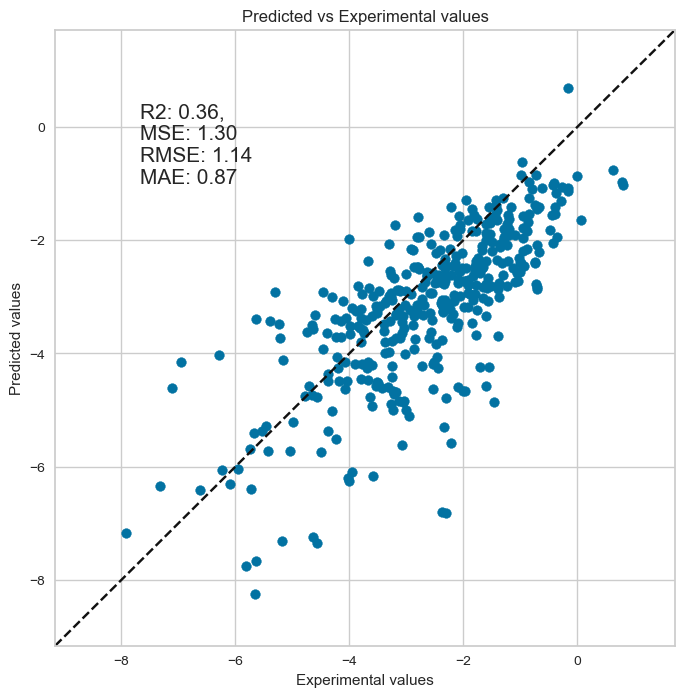

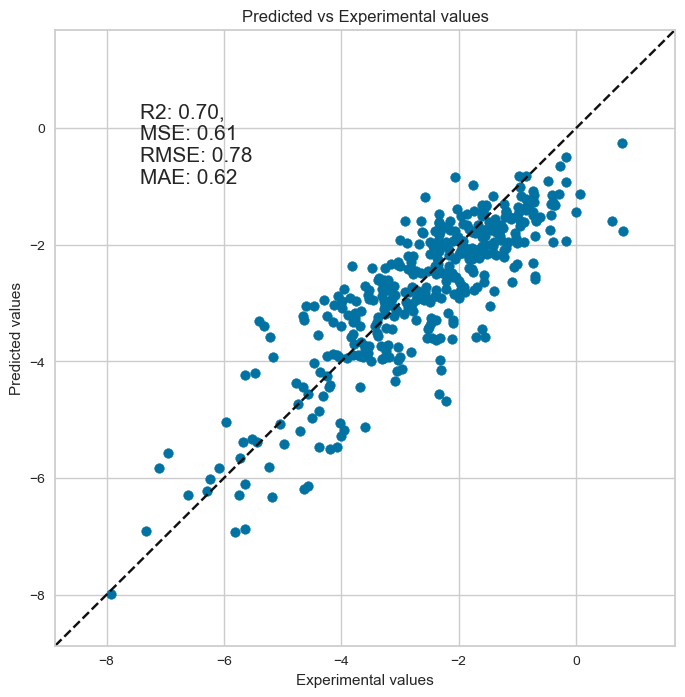

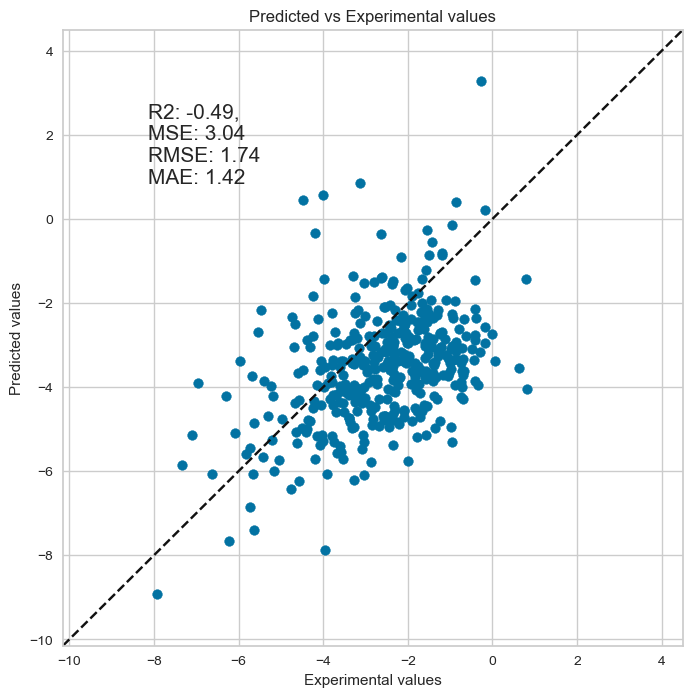

In [6]:
y_true = pd.read_csv('../data/processed/test_smiles.csv').y_true
no_features_preds = pd.read_csv("../models/predictions/test_predictions_no_features_model.csv").y_true
rdkit_preds = pd.read_csv("../models/predictions/test_predictions_rdkit2d_model.csv").y_true
morg_preds = pd.read_csv("../models/predictions/test_predictions_morg_model.csv").y_true

for preds in [no_features_preds, rdkit_preds, morg_preds]:
    regression_model(y_true, preds)

## Optimized model

The neural network hyperparameters were optimized using Chemprop's optimize functions. This model was used to make predictions on the test set with and R2 of 0.71, a slight improvement.

In [7]:
%%capture
optimize_model();
optimized_model_predict();

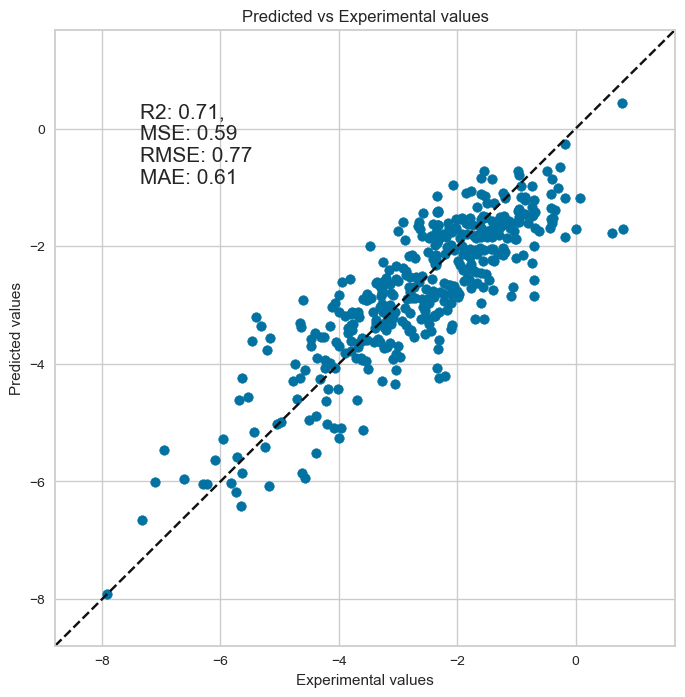

In [8]:
y_true = pd.read_csv('../data/processed/test_smiles.csv').y_true
optimzed_preds = pd.read_csv("../models/predictions/test_predictions_optimized_model.csv").y_true
regression_model(y_true, optimzed_preds)